<a href="https://colab.research.google.com/github/Divyakathirvel26/Covid-19/blob/master/Covid_19_VGG_16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
image_size = [224,224]
data_path = 'Data'

In [ ]:
vgg = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.output

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

In [ ]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [ ]:
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [ ]:
preds = Dense(2,activation='softmax')(x)

In [ ]:
model = Model(inputs = vgg.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('drive/My Drive/covid-data/' ,
                                                  target_size=(224,224),
                                                  color_mode='rgb' ,
                                                  batch_size=32,
                                                  class_mode='categorical' ,
                                                  shuffle = True)

Found 519 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
r = model.fit_generator(generator=train_generator,
                        steps_per_epoch=step_size_train,
                        epochs=5)

Epoch 1/5
16/16 [==============================] - 310s 19s/step - loss: 1.3539 - accuracy: 0.5914
Epoch 2/5
16/16 [==============================] - 7s 449ms/step - loss: 0.6077 - accuracy: 0.6797
Epoch 3/5
16/16 [==============================] - 7s 451ms/step - loss: 0.5165 - accuracy: 0.7577
Epoch 4/5
16/16 [==============================] - 7s 458ms/step - loss: 0.4070 - accuracy: 0.8357
Epoch 5/5
16/16 [==============================] - 7s 439ms/step - loss: 0.3444 - accuracy: 0.8398


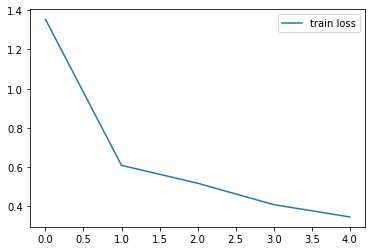

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

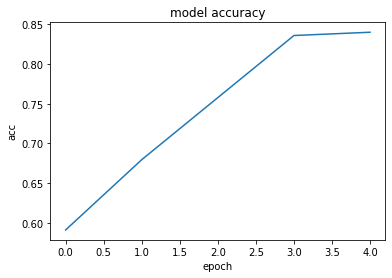

In [ ]:
plt.plot(r.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('covid.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('covid.h5')

In [ ]:
img_path = 'drive/My Drive/covid-data/Test/Normal/2.jpeg'

In [ ]:
img = image.load_img(img_path,target_size=(224,224))
x= image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [ ]:
rslt = model.predict(img_data)
print(rslt)

[[0.92346275 0.0765373 ]]


In [ ]:
if rslt[0][0] == 1:
  prediction = 'Not a covid patient'
else:
  prediction = 'Covid patient'
print(prediction)

Covid patient
